# **Importing Packages and Libraries**

In [ ]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat

# Path Process
import os
import os.path
from pathlib import Path
import glob



#Model
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate

#Image Proces
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter

#**Defining imshow()**
*    This function plots the image passed as parameter.

*   cv2.cvtColor converts BGR to RGB color format (otherwise, it displays incorrect color image).



In [ ]:
# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Mouting Google Drive to import required dataset.
We have used Shanghai Tech dataset for our project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Main Data Processing**

>  This dataset consists of two parts: there are 482 images in Part A which
are randomly crawled from the Internet, and 716 images in
Part B which are taken from the busy streets of metropolitan
areas in Shanghai.

> Both Part A and Part B contain images seperately used for training and testing.


*   Images : Random images of the crowd taken from the internet and streets of Shanghai.
*   Ground Truth: The ground truth is a 64D
or 192D vector where each entry is the total number of persons in corresponding patch.

##Loading Images and Ground Truth value

In [ ]:
# Storing path of ground truth and images from part A into Ground_Truth_Path_A and Images_Path_A variables respectively.
Ground_Truth_Path_A = Path('/content/drive/MyDrive/Datasets/part_A/train_data/ground-truth/')
Images_Path_A = Path('/content/drive/MyDrive/Datasets/part_A/train_data/images/')

In [ ]:
# Storing path of ground truth and images from part B into Ground_Truth_Path_B and Images_Path_B variables respectively.
Ground_Truth_Path_B = Path('/content/drive/MyDrive/Datasets/part_B/train_data/ground-truth/')
Images_Path_B = Path('/content/drive/MyDrive/Datasets/part_B/train_data/images/')

In [ ]:
Ground_Truth_Path_A_test = Path('/content/drive/MyDrive/Datasets/part_A/test_data/ground-truth/')
Images_Path_A_test = Path('/content/drive/MyDrive/Datasets/part_A/test_data/images/')

Ground_Truth_Path_B_test = Path('/content/drive/MyDrive/Datasets/part_B/test_data/ground-truth/')
Images_Path_B_test = Path('/content/drive/MyDrive/Datasets/part_B/test_data/images/')

##Coordinates and Image Path

In [ ]:
#glob returns all file paths that match the pattern ".mat"
GT_List_A = list(Ground_Truth_Path_A.glob(r"*.mat"))
GT_List_B = list(Ground_Truth_Path_B.glob(r"*.mat"))

In [ ]:
#glob returns all file paths that match the pattern ".jpg"
Images_List_A = list(Images_Path_A.glob(r"*.jpg"))
Images_List_B = list(Images_Path_B.glob(r"*.jpg"))

In [ ]:
GT_List_A_test = list(Ground_Truth_Path_A_test.glob(r"*.mat"))
Images_List_A_test = list(Images_Path_A_test.glob(r"*.jpg"))

GT_List_B_test = list(Ground_Truth_Path_B_test.glob(r"*.mat"))
Images_List_B_test = list(Images_Path_B_test.glob(r"*.jpg"))

In [ ]:
#return the sorted list of the specified list
GT_List_A = sorted(GT_List_A)
GT_List_B = sorted(GT_List_B)
Images_List_A = sorted(Images_List_A)
Images_List_B = sorted(Images_List_B)

In [ ]:
GT_List_A_test = sorted(GT_List_A_test)
Images_List_A_test = sorted(Images_List_A_test)

GT_List_B_test = sorted(GT_List_B_test)
Images_List_B_test = sorted(Images_List_B_test)

In [ ]:
#Printing the length of all the list objects
print("LEN A GT: ",len(GT_List_A))
print("---"*5)
print("LEN A IMAGES: ",len(Images_List_A))
print("---"*20)
print("LEN B GT: ",len(GT_List_B))
print("---"*5)
print("LEN B IMAGES: ",len(Images_List_B))

LEN A GT:  300
---------------
LEN A IMAGES:  300
------------------------------------------------------------
LEN B GT:  400
---------------
LEN B IMAGES:  400


In [ ]:
print("LEN A GT: ",len(GT_List_A_test))
print("---"*5)
print("LEN A IMAGES: ",len(Images_List_A_test))
print("---"*20)
print("LEN B GT: ",len(GT_List_B_test))
print("---"*5)
print("LEN B IMAGES: ",len(Images_List_B_test))

LEN A GT:  182
---------------
LEN A IMAGES:  182
------------------------------------------------------------
LEN B GT:  316
---------------
LEN B IMAGES:  316


In [ ]:
# Printing first value of both the lists
print(GT_List_A[0])
print(Images_List_A[0])

/content/drive/MyDrive/Datasets/part_A/train_data/ground-truth/GT_IMG_1.mat
/content/drive/MyDrive/Datasets/part_A/train_data/images/IMG_1.jpg


##Total MAT and Images

In [ ]:
#Combining part_A and part_B .mat files and image files together
#The zip() command take 4 lists as arguments and returns a single iterator object, having mapped values from all the lists
Total_Mat_Path = []
Total_Image_Path = []

for ma_path,mb_path,ia_path,ib_path in zip(GT_List_A,GT_List_B,Images_List_A,Images_List_B):
    Total_Mat_Path.append(ma_path)
    Total_Mat_Path.append(mb_path)
    Total_Image_Path.append(ia_path)
    Total_Image_Path.append(ib_path)

In [ ]:
Total_Mat_Path_test = []
Total_Image_Path_test = []

for ma_path,mb_path,ia_path,ib_path in zip(GT_List_A_test,GT_List_B_test,Images_List_A_test,Images_List_B_test):
    Total_Mat_Path_test.append(ma_path)
    Total_Mat_Path_test.append(mb_path)
    Total_Image_Path_test.append(ia_path)
    Total_Image_Path_test.append(ib_path)

In [ ]:
# Printing the length of Total_Mat_Path and Total_Image_Path lists
print("MAIN MAT LEN: ",len(Total_Mat_Path))
print("---"*5)
print("MAIN IMAGE LEN: ",len(Total_Image_Path))

MAIN MAT LEN:  600
---------------
MAIN IMAGE LEN:  600


In [ ]:
print("MAIN MAT LEN: ",len(Total_Mat_Path_test))
print("---"*5)
print("MAIN IMAGE LEN: ",len(Total_Image_Path_test))

MAIN MAT LEN:  364
---------------
MAIN IMAGE LEN:  364


In [ ]:
# Printing first value of both the lists
print(Total_Image_Path_test[0])
print(Total_Image_Path[0])

/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_1.jpg
/content/drive/MyDrive/Datasets/part_A/train_data/images/IMG_1.jpg


In [ ]:
# Creating a series from list object and changing its data type to string
Image_Path_Series = pd.Series(Total_Image_Path,name="IMAGE").astype(str)
Mat_Path_Series = pd.Series(Total_Mat_Path,name="MAT").astype(str)

In [ ]:
Image_Path_Series_test = pd.Series(Total_Image_Path_test,name="IMAGE").astype(str)
Mat_Path_Series_test = pd.Series(Total_Mat_Path_test,name="MAT").astype(str)

# **Creating Train Data**


```
 This function takes two lists Image_Path_Series and Mat_Path_Series and converts them into a format which can be displayed as an image having
 it blurred (using gaussian_filter), resizing the image and appending all the new images to newly created variables Image_Label_List and
 Mat_Label_List. After storing the images into the new variables they can be easily plotted using imshow().
```

* The loadmat() converts the mat path values to contain mat data i.e. coordinates in matlab file.
*  Main_Zeroes is an array filled with zeroes, of shape same as the dimensions of image and data type float.  
*  Gaussian filter returns the same array passed as a parameter and a standard deviation of "sigma".
* Resizing of images is done using cv2.resize().
* Epochs specify the number of samples for which the below process would be running i.e. 600.



In [ ]:
#THIS ONE IS RUNNING
Image_Label_List = []
Mat_Label_List = []

total_added = []
total_not_added = []
time_count = 0

for x_images,x_mat in zip(Image_Path_Series.values,Mat_Path_Series.values):

    try:
        time_count += 1
        Reading_Image = cv2.cvtColor(cv2.imread(x_images),cv2.COLOR_BGR2RGB)

        Coordinates_x_info = loadmat(x_mat)["image_info"]
        Coordinates_x = Coordinates_x_info[0][0][0][0][0]

        Main_Zeros = np.zeros((Reading_Image.shape[0], Reading_Image.shape[1]), dtype=np.float32)
        for x_cor, y_cor in Coordinates_x:
            x_cor = int(x_cor)
            y_cor = int(y_cor)
            Main_Zeros[y_cor, x_cor] = 1

        Gaussian_Image_With_Coordinates = gaussian_filter(Main_Zeros,sigma=6,truncate=6*6)

        Resized_Image = cv2.resize(Reading_Image,(180,180))
        Resized_Gaussian_Image = cv2.resize(Gaussian_Image_With_Coordinates,(180,180))

        Image_Label_List.append(Resized_Image)
        Mat_Label_List.append(Resized_Gaussian_Image)
        total_added.append(str(time_count))

    except :
        total_not_added.append(str(time_count))
        pass

print(f"{len(total_not_added)} EPOCHS NOT ADDED")
print("---"*20)
print(f"{len(total_added)} EPOCHS ADDED")

0 EPOCHS NOT ADDED
------------------------------------------------------------
600 EPOCHS ADDED


In [ ]:
Image_Label_List_test = []
Mat_Label_List_test = []

total_added = []
total_not_added = []
time_count = 0

for x_images,x_mat in zip(Image_Path_Series_test.values,Mat_Path_Series_test.values):

    try:
        time_count += 1
        Reading_Image = cv2.cvtColor(cv2.imread(x_images),cv2.COLOR_BGR2RGB)

        Coordinates_x_info = loadmat(x_mat)["image_info"]
        Coordinates_x = Coordinates_x_info[0][0][0][0][0]

        Main_Zeros = np.zeros((Reading_Image.shape[0], Reading_Image.shape[1]), dtype=np.float32)
        for x_cor, y_cor in Coordinates_x:
            x_cor = int(x_cor)
            y_cor = int(y_cor)
            Main_Zeros[y_cor, x_cor] = 1

        Gaussian_Image_With_Coordinates = gaussian_filter(Main_Zeros,sigma=6,truncate=6*6)

        Resized_Image = cv2.resize(Reading_Image,(180,180))
        Resized_Gaussian_Image = cv2.resize(Gaussian_Image_With_Coordinates,(180,180))

        Image_Label_List_test.append(Resized_Image)
        Mat_Label_List_test.append(Resized_Gaussian_Image)
        total_added.append(str(time_count))

    except :
        total_not_added.append(str(time_count))
        pass

print(f"{len(total_not_added)} EPOCHS NOT ADDED")
print("---"*20)
print(f"{len(total_added)} EPOCHS ADDED")

0 EPOCHS NOT ADDED
------------------------------------------------------------
364 EPOCHS ADDED


In [ ]:
# Printing length of Mat_Label_List and Image_Label_List lists
print("MAT LEN: ",len(Mat_Label_List_test))
print("IMAGE LEN: ",len(Image_Label_List_test))

MAT LEN:  364
IMAGE LEN:  364


In [ ]:
print("MAT LEN: ",len(Mat_Label_List))
print("IMAGE LEN: ",len(Image_Label_List))

In [ ]:
# Printing the shape of each mat and original image
print("MAT IMAGE SHAPE: ",Mat_Label_List[0].shape)
print("ORIGINAL IMAGE SHAPE: ",Image_Label_List[0].shape)

MAT IMAGE SHAPE:  (180, 180)
ORIGINAL IMAGE SHAPE:  (180, 180, 3)


In [ ]:
print("MAT IMAGE SHAPE: ",Mat_Label_List_test[0].shape)
print("ORIGINAL IMAGE SHAPE: ",Image_Label_List_test[0].shape)

MAT IMAGE SHAPE:  (180, 180)
ORIGINAL IMAGE SHAPE:  (180, 180, 3)


In [ ]:
# Converting list to array and printing the shape of both the arrays
print("WHEN IT IS ARRAY MAT SHAPE: ",np.shape(np.array(Mat_Label_List)))
print("WHEN IT IS ARRAY IMAGE SHAPE: ",np.shape(np.array(Image_Label_List)))

WHEN IT IS ARRAY MAT SHAPE:  (600, 180, 180)
WHEN IT IS ARRAY IMAGE SHAPE:  (600, 180, 180, 3)


In [ ]:
print("WHEN IT IS ARRAY MAT SHAPE: ",np.shape(np.array(Mat_Label_List_test)))
print("WHEN IT IS ARRAY IMAGE SHAPE: ",np.shape(np.array(Image_Label_List_test)))

WHEN IT IS ARRAY MAT SHAPE:  (364, 180, 180)
WHEN IT IS ARRAY IMAGE SHAPE:  (364, 180, 180, 3)


# **Plotting Images**
`imshow() function in pyplot module is used to display 2D data as an image i.e. as a 2D regular raster`

  *Parameters :*

1.   "image" - This parameter takes data to be displayed as 2D rastar image
2.   "cmap" - This parameter is a colormap instance or registered colormap name




Text(0.5, 1.0, 'ORIGINAL')

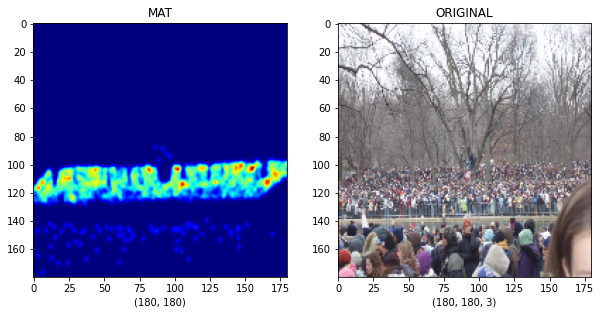

In [ ]:
# Plotting Mat Image and Original Image using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[0],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[0].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[0])
axis[1].set_xlabel(Image_Label_List[0].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

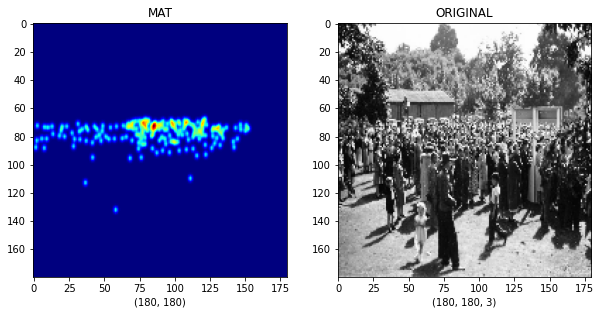

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List_test[0],cmap="jet")
axis[0].set_xlabel(Mat_Label_List_test[0].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List_test[0])
axis[1].set_xlabel(Image_Label_List_test[0].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

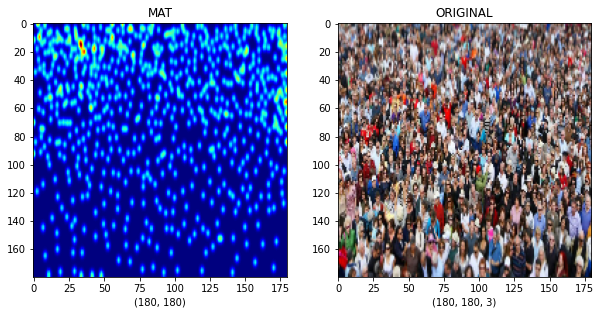

In [ ]:
# Plotting Mat Image and Original Image using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[220],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[220].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[220])
axis[1].set_xlabel(Image_Label_List[220].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

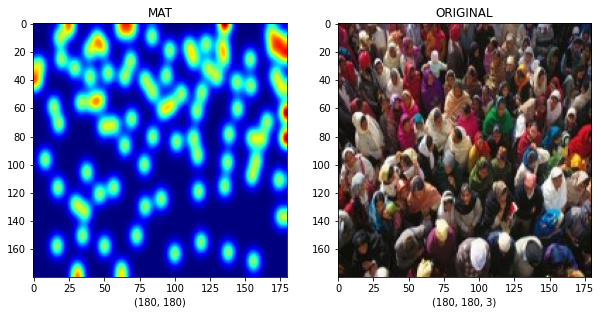

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List_test[220],cmap="jet")
axis[0].set_xlabel(Mat_Label_List_test[220].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List_test[220])
axis[1].set_xlabel(Image_Label_List_test[220].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

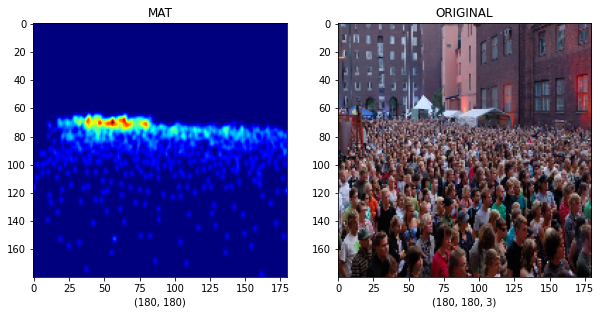

In [ ]:
# Plotting Mat Image and Original Image using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[22],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[22].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[22])
axis[1].set_xlabel(Image_Label_List[22].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

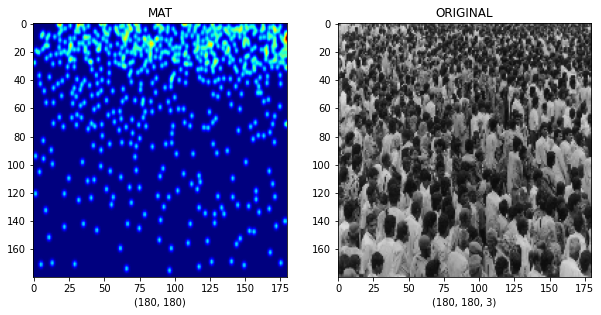

In [ ]:
# Plotting Mat Image and Original Image using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[16],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[16].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[16])
axis[1].set_xlabel(Image_Label_List[16].shape)
axis[1].set_title("ORIGINAL")

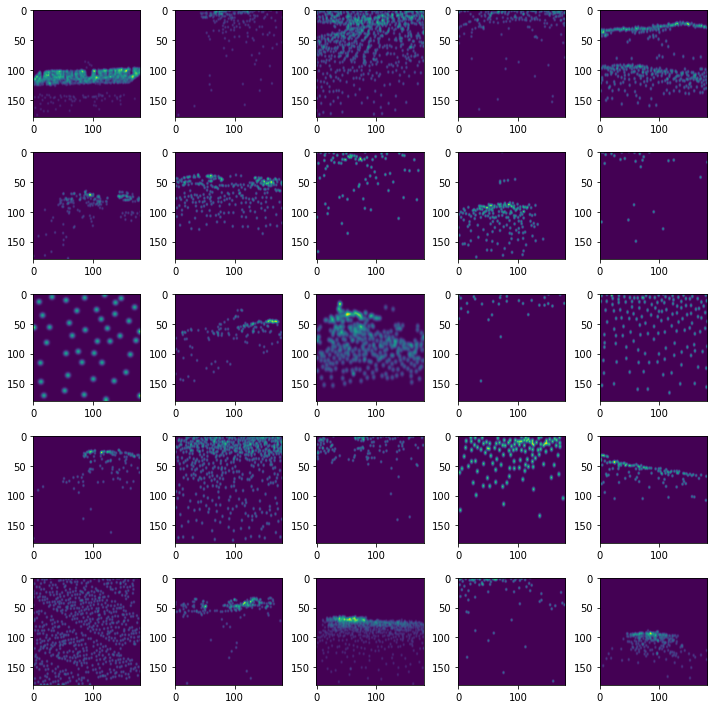

In [ ]:
# Plotting mutliple density plots using imshow() function defined above by iterating through each plot
# The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust subplot parameters to give specified padding.
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operation in enumerate(axis.flat):

    Mat_Picking_Image = Mat_Label_List[indexing]
    operation.imshow(Mat_Picking_Image)

plt.tight_layout()
plt.show()

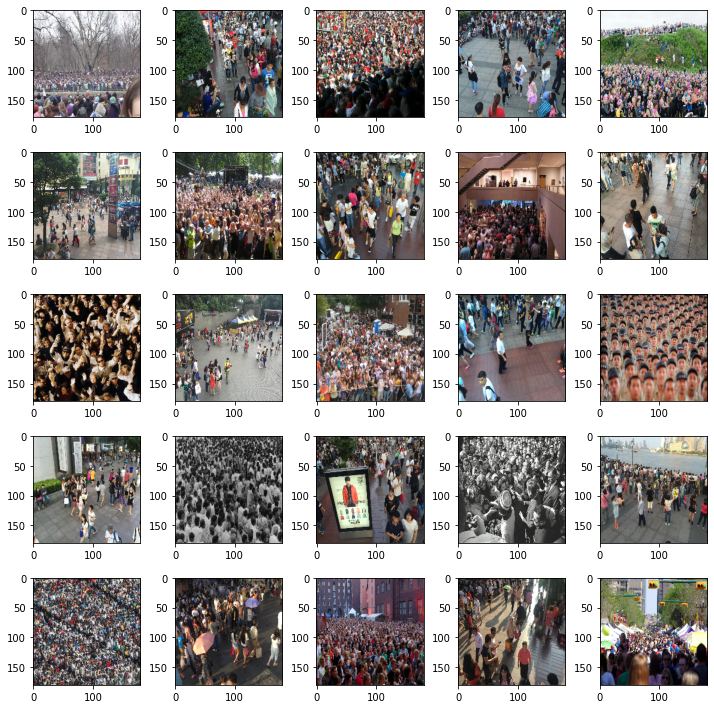

In [ ]:
# Plotting mutliple Original Images using imshow() defined above by iterating through each plot
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operation in enumerate(axis.flat):

    Image_Picking_Image = Image_Label_List[indexing]
    operation.imshow(Image_Picking_Image)

plt.tight_layout()
plt.show()

# **To Array and Data Normalization**
We have divided the data into X_Train and X_Test for training and testing of our model. The data is stored into two numpy arrays X_Train and X_Test respectively. Then, to bring our data into the usual input range we have normalized it using X_Train / 255. and X_Test / 255. respectively.

In [ ]:
# Creating two arrays by dividing our dataset into training and testing data
X_Train = np.array(Image_Label_List,dtype="float32")
X_Test = np.array(Mat_Label_List,dtype="float32")

In [ ]:
Y_Train = np.array(Image_Label_List_test,dtype="float32")
Y_Test = np.array(Mat_Label_List_test,dtype="float32")

In [ ]:
# Priniting shape of both the new arrays
print("TRAIN SHAPE: ",X_Train.shape)
print("TEST SHAPE: ",X_Test.shape)

TRAIN SHAPE:  (600, 180, 180, 3)
TEST SHAPE:  (600, 180, 180)


In [ ]:
print("TRAIN SHAPE: ",Y_Train.shape)
print("TEST SHAPE: ",Y_Test.shape)

TRAIN SHAPE:  (364, 180, 180, 3)
TEST SHAPE:  (364, 180, 180)


In [ ]:
# Data Nomalization of train and test data
X_Train = X_Train / 255.
X_Test = X_Test / 255.

In [ ]:
Y_Train = Y_Train / 255.
Y_Test = Y_Test / 255.

Text(0.5, 1.0, 'ORIGINAL')

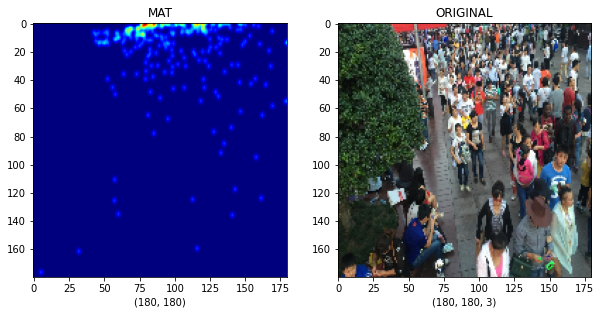

In [ ]:
# Plotting X_Train Image and X_Test Images using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(X_Test[1],cmap="jet")
axis[0].set_xlabel(X_Test[1].shape)
axis[0].set_title("MAT")
axis[1].imshow(X_Train[1])
axis[1].set_xlabel(X_Train[1].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

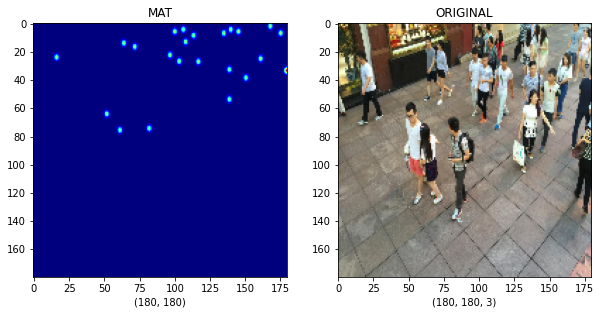

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Y_Test[1],cmap="jet")
axis[0].set_xlabel(Y_Test[1].shape)
axis[0].set_title("MAT")
axis[1].imshow(Y_Train[1])
axis[1].set_xlabel(Y_Train[1].shape)
axis[1].set_title("ORIGINAL")

# **CONV2D - CONV2DTRANPOSE AUTO ENCODER PROCESS**



## **What is Auto-Encoding ?**



> "Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human.


> 1) Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

> 2) Autoencoders are lossy, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

> 3) Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

## **How to build an auto-encoder?**

> To build an autoencoder, we need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent.

## **Callback**

In [ ]:
# Defining a stop training variable Early_Stopper when a particular metric has stopped improving
# Checkpoint_Model is a callback to save the keras model or model weights at some frequency, so the model or weights can be loaded
# later to continue the training from the state saved.
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

## **Parameters**

In [ ]:
# computes the quantity that the model should seek to minimize during training
compile_loss = "mse"
compile_optimizer = Adam(lr=0.0000001)
output_class = 1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## **Encoder**

Process of training a model

*   Creating a Sequential Model
*   Passing a list of layers to Sequential Constructor

*Parameters :*
*   The **first** required Conv2D parameter is the number of filters that the convolutional layer will learn
*   The **second** required parameter we need to provide to the Keras Conv2D class is the kernel_size , a 2-tuple specifying the width and height of the 2D convolution window.
*   The **kernel_initializer** controls the initialization method used to initialize all values in the Conv2D class prior to actually training the network.

**Batch Normalization** : Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

**ReLu Activation Funtion:** We have used ReLu activation function in our deep learning model.


In [ ]:
#
Encoder_AE = Sequential()
Encoder_AE.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())
#
Encoder_AE.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())
#
Encoder_AE.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())
#
Encoder_AE.add(Conv2D(256,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())

## **Decoder**


In [ ]:
Decoder_AE = Sequential()
Decoder_AE.add(Conv2DTranspose(128,(2,2)))
Decoder_AE.add(ReLU())
#
Decoder_AE.add(Conv2DTranspose(64,(2,2)))
Decoder_AE.add(ReLU())
#
Decoder_AE.add(Conv2DTranspose(32,(2,2)))
Decoder_AE.add(ReLU())
#
Decoder_AE.add(Conv2DTranspose(output_class,(2,2)))
Decoder_AE.add(ReLU())

In [ ]:
# Buliding a sequential model to train and test data
Auto_Encoder = Sequential([Encoder_AE,Decoder_AE])

In [ ]:
# Configures the model for training
Auto_Encoder.compile(loss=compile_loss,optimizer=compile_optimizer)

In [ ]:
# Training the model for a fixed number of epochs(in our case, we have taken 10 epochs)
Model_AutoEncoder_Histoyr = Auto_Encoder.fit(X_Train,X_Test,epochs=10,callbacks=[Checkpoint_Model])

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 7.4626e-04 

19/19 [==============================] - 837s 44s/step - loss: 7.4626e-04
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 7.1951e-04 

19/19 [==============================] - 829s 44s/step - loss: 7.1951e-04
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 6.9615e-04 

19/19 [==============================] - 835s 44s/step - loss: 6.9615e-04
Epoch 4/10
19/19 [==============================] - ETA: 0s - loss: 6.7387e-04 

19/19 [==============================] - 840s 44s/step - loss: 6.7387e-04
Epoch 5/10
19/19 [==============================] - ETA: 0s - loss: 6.5182e-04 

19/19 [==============================] - 844s 44s/step - loss: 6.5182e-04
Epoch 6/10
19/19 [==============================] - ETA: 0s - loss: 6.3433e-04 

19/19 [==============================] - 854s 45s/step - loss: 6.3433e-04
Epoch 7/10
19/19 [==============================] - ETA: 0s - loss: 6.0837e-04 

19/19 [==============================] - 844s 44s/step - loss: 6.0837e-04
Epoch 8/10
19/19 [==============================] - ETA: 0s - loss: 5.9087e-04 

19/19 [==============================] - 848s 45s/step - loss: 5.9087e-04
Epoch 9/10
19/19 [==============================] - ETA: 0s - loss: 5.7069e-04 

19/19 [==============================] - 848s 45s/step - loss: 5.7069e-04
Epoch 10/10
19/19 [==============================] - ETA: 0s - loss: 5.5297e-04 

19/19 [==============================] - 855s 45s/step - loss: 5.5297e-04


In [ ]:
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
Prediction_Seen = Auto_Encoder.predict(X_Train[:5])

In [ ]:
Prediction_Test = Auto_Encoder.predict(Y_Train[:5])

In [ ]:
# Printing the shape of a Prediction_Seen value
Prediction_Seen[4].shape

(180, 180, 1)

In [ ]:
Prediction_Test.shape

(5, 180, 180, 1)

Text(0.5, 1.0, 'MAT FILE')

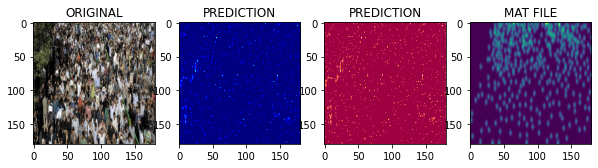

In [ ]:
# Plotting newly trained X_Train Image and X_Test Images using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,4,figsize=(10,10))
axis[0].imshow(Y_Train[4])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(Prediction_Test[4]),cmap="jet")
axis[1].set_title("PREDICTION")
axis[2].imshow(tf.squeeze(Prediction_Test[4]),cmap="Spectral")
axis[2].set_title("PREDICTION")
axis[3].imshow(Y_Test[4])
axis[3].set_title("MAT FILE")

Text(0.5, 1.0, 'PREDICTION')

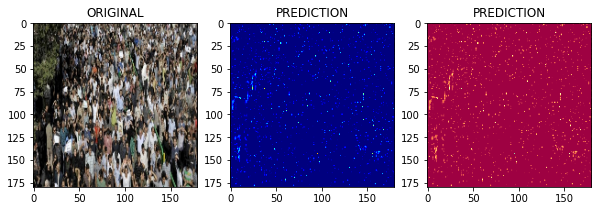

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(10,10))
axis[0].imshow(Y_Train[4])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(Prediction_Test[4]),cmap="jet")
axis[1].set_title("PREDICTION")
axis[2].imshow(tf.squeeze(Prediction_Test[4]),cmap="Spectral")
axis[2].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

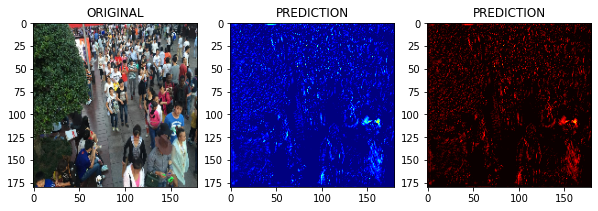

In [ ]:
# Plotting newly trained X_Train Image and X_Test Images using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,3,figsize=(10,10))
axis[0].imshow(X_Train[1])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(Prediction_Seen[1]),cmap="jet")
axis[1].set_title("PREDICTION")
axis[2].imshow(tf.squeeze(Prediction_Seen[1]),cmap="hot")
axis[2].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

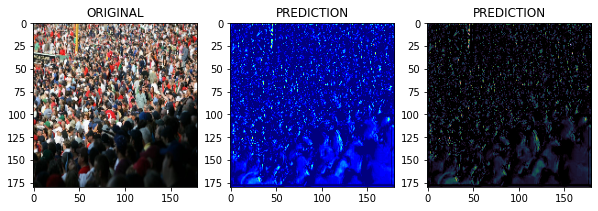

In [ ]:
# Plotting newly trained X_Train Image and X_Test Images using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,3,figsize=(10,10))
axis[0].imshow(X_Train[2])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(Prediction_Seen[2]),cmap="jet")
axis[1].set_title("PREDICTION")
axis[2].imshow(tf.squeeze(Prediction_Seen[2]),cmap="cubehelix")
axis[2].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

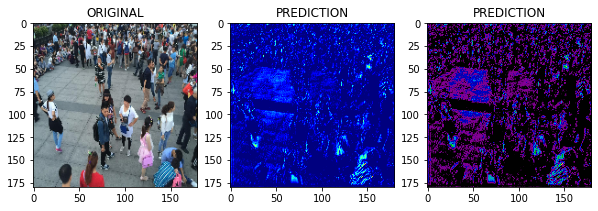

In [ ]:
# Plotting newly trained X_Train Image and X_Test Images using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,3,figsize=(10,10))
axis[0].imshow(X_Train[3])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(Prediction_Seen[3]),cmap="jet")
axis[1].set_title("PREDICTION")
axis[2].imshow(tf.squeeze(Prediction_Seen[3]),cmap="nipy_spectral")
axis[2].set_title("PREDICTION")

Text(0.5, 1.0, '0.03248247')

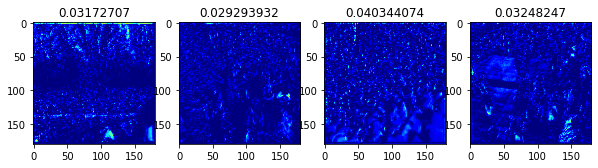

In [ ]:
# Plotting mutliple newly trained X_Train Image and X_Test Images using imshow() with titles and shape of each image
figure,axis = plt.subplots(1,4,figsize=(10,10))
axis[0].imshow(np.squeeze(Prediction_Seen[0], axis = 2),cmap="jet")
axis[0].set_title(np.mean(Prediction_Seen[0]))
axis[1].imshow(tf.squeeze(Prediction_Seen[1]),cmap="jet")
axis[1].set_title(np.mean(Prediction_Seen[1]))
axis[2].imshow(tf.squeeze(Prediction_Seen[2]),cmap="jet")
axis[2].set_title(np.mean(Prediction_Seen[2]))
axis[3].imshow(tf.squeeze(Prediction_Seen[3]),cmap="jet")
axis[3].set_title(np.mean(Prediction_Seen[3]))

In [ ]:
# Printing the mean of all prediction density
Mean_One = np.mean(Prediction_Seen[0])
Mean_Two = np.mean(Prediction_Seen[1])
Mean_Three = np.mean(Prediction_Seen[2])
Mean_Four = np.mean(Prediction_Seen[3])

print(Mean_One)
print(Mean_Two)
print(Mean_Three)
print(Mean_Four)

0.03172707
0.029293932
0.040344074
0.03248247


In [ ]:
# Checking
Mean_One = np.mean(X_Train[0])
Mean_Two = np.mean(X_Train[1])
Mean_Three = np.mean(X_Train[2])
Mean_Four = np.mean(X_Train[3])

print(Mean_One)
print(Mean_Two)
print(Mean_Three)
print(Mean_Four)

0.56387025
0.3298968
0.32653934
0.42990637


In [ ]:
Prediction_Test = Auto_Encoder.predict(Y_Train)

In [ ]:
mse = np.mean(tf.squeeze(Prediction_Test) - Y_Test)
mse

0.0016525434

In [ ]:
accuracy = (1 - mse) * 100
accuracy

99.83474565669894

In [ ]:
# Loading 3 other images from part_A test dataset
Non_Seen_Image_One = "/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_110.jpg"
Non_Seen_Image_Two = "/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_123.jpg"
Non_Seen_Image_Three = "/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_100.jpg"

In [ ]:
# Using the imread() function to read the image and cvtColor() function to convert it into RGB color format
Reading_Sample = cv2.cvtColor(cv2.imread(Non_Seen_Image_One),cv2.COLOR_BGR2RGB)
# Resizing the image
Resized_Sample = cv2.resize(Reading_Sample,(180,180))
# Reshaping the image
Prediction_Resized_Sample = Resized_Sample.reshape(-1,180,180,3)

In [ ]:
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
Prediction_Non_Seen = Auto_Encoder.predict(Prediction_Resized_Sample)
Prediction_Non_Seen = Prediction_Non_Seen.reshape(180,180)

Text(0.5, 1.0, 'PREDICTION')

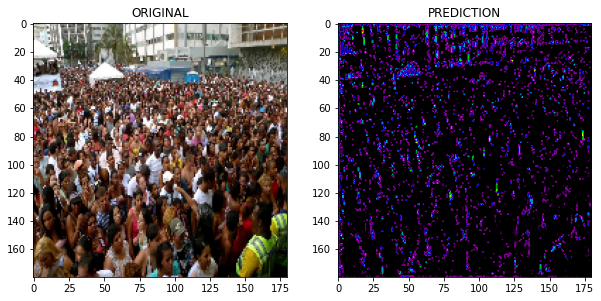

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(Resized_Sample)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Prediction_Non_Seen,cmap="nipy_spectral")
axis[1].set_title("PREDICTION")

In [ ]:
#Two
# Using the imread() function to read the image and cvtColor() function to convert it into RGB color format
Reading_Sample = cv2.cvtColor(cv2.imread(Non_Seen_Image_Two),cv2.COLOR_BGR2RGB)
Resized_Sample = cv2.resize(Reading_Sample,(180,180))
Prediction_Resized_Sample = Resized_Sample.reshape(-1,180,180,3)
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
Prediction_Non_Seen = Auto_Encoder.predict(Prediction_Resized_Sample)
Prediction_Non_Seen = Prediction_Non_Seen.reshape(180,180)

Text(0.5, 1.0, 'PREDICTION')

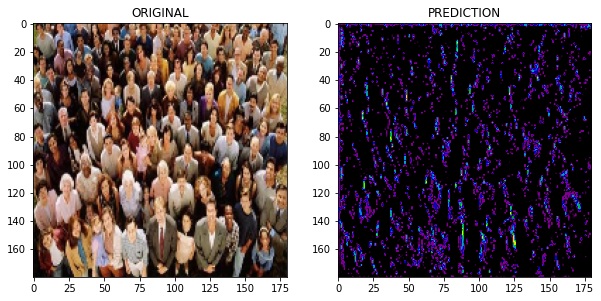

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(Resized_Sample)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Prediction_Non_Seen,cmap="nipy_spectral")
axis[1].set_title("PREDICTION")

In [ ]:
#Three
# Using the imread() function to read the image and cvtColor() function to convert it into RGB color format
Reading_Sample = cv2.cvtColor(cv2.imread(Non_Seen_Image_Three),cv2.COLOR_BGR2RGB)
Resized_Sample = cv2.resize(Reading_Sample,(180,180))
Prediction_Resized_Sample = Resized_Sample.reshape(-1,180,180,3)
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
Prediction_Non_Seen = Auto_Encoder.predict(Prediction_Resized_Sample)
Prediction_Non_Seen = Prediction_Non_Seen.reshape(180,180)

Text(0.5, 1.0, 'PREDICTION')

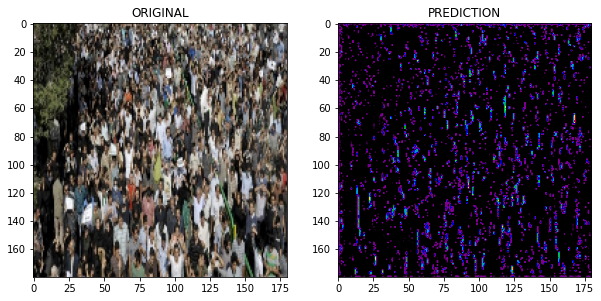

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(Resized_Sample)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Prediction_Non_Seen,cmap="nipy_spectral")
axis[1].set_title("PREDICTION")

## **For the Spectrum Auto Encoder Process we use a different activation function - LeakyReLu.**

> Leaky Rectified Linear Unit, or Leaky ReLU, is a type of activation function based on a ReLU, but it has a small slope for negative values instead of a flat slope. The slope coefficient is determined before training, i.e. it is not learnt during training. This type of activation function is popular in tasks where we we may suffer from sparse gradients, for example training generative adversarial networks.





# **Spectrum Auto Encoder Process**
Process of training a model

*   Creating a Sequential Model
*   Passing a list of layers to Sequential Constructor

*Parameters :*
*   The **first** required Conv2D parameter is the number of filters that the convolutional layer will learn
*   The **second** required parameter we need to provide to the Keras Conv2D class is the kernel_size , a 2-tuple specifying the width and height of the 2D convolution window.
*   The **kernel_initializer** controls the initialization method used to initialize all values in the Conv2D class prior to actually training the network.

**Batch Normalization** : Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

**LeakyReLu Activation Funtion:** This time, we have used LeakyReLu activation function in our deep learning model.
It allows a small gradient when a unit is not active.


In [ ]:
Encoder = Sequential()
#
Encoder.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal'))
Encoder.add(BatchNormalization())
Encoder.add(LeakyReLU())
#
Encoder.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal'))
Encoder.add(BatchNormalization())
Encoder.add(LeakyReLU())


Decoder = Sequential()
#
Decoder.add(Conv2DTranspose(32,(2,2)))
Decoder.add(LeakyReLU())
#
Decoder.add(Conv2DTranspose(output_class,(2,2)))
Decoder.add(LeakyReLU())

In [ ]:
# Buliding a sequential model to train and test data
ANN_AutoEncoder = Sequential([Encoder,Decoder])

In [ ]:
# Configures the model for training
ANN_AutoEncoder.compile(loss="mse",optimizer=RMSprop(lr=0.000001))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Training the model for a fixed number of epochs(in our case, we have taken 10 epochs)
Hıstory_Complex = ANN_AutoEncoder.fit(X_Train,X_Test,epochs=10)

In [ ]:
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
ANN_Prediction_Images = ANN_AutoEncoder.predict(X_Train[:5])

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(X_Train[1])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(ANN_Prediction_Images[1]),cmap="nipy_spectral")
axis[1].set_title("PREDICTION")

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(X_Train[2])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(ANN_Prediction_Images[2]),cmap="jet")
axis[1].set_title("PREDICTION")

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(X_Train[3])
axis[0].set_title("ORIGINAL")
axis[1].imshow(tf.squeeze(ANN_Prediction_Images[3]),cmap="hot")
axis[1].set_title("PREDICTION")

In [ ]:
# Loading the image from dataset
Non_Seen_Image = "/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_151.jpg"
# Using the imread() function to read the image and cvtColor() function to convert it into RGB color format
Reading_Sample = cv2.cvtColor(cv2.imread(Non_Seen_Image),cv2.COLOR_BGR2RGB)
Resized_Sample = cv2.resize(Reading_Sample,(180,180))
Prediction_Resized_Sample = Resized_Sample.reshape(-1,180,180,3)
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
Prediction_Non_Seen = ANN_AutoEncoder.predict(Prediction_Resized_Sample)
Prediction_Non_Seen = Prediction_Non_Seen.reshape(180,180)

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(Resized_Sample)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Prediction_Non_Seen,cmap="hot")
axis[1].set_title("PREDICTION")

In [ ]:
# Loading the image from the dataset
Non_Seen_Image = "/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_149.jpg"
# Using the imread() function to read the image and cvtColor() function to convert it into RGB color format
Reading_Sample = cv2.cvtColor(cv2.imread(Non_Seen_Image),cv2.COLOR_BGR2RGB)
Resized_Sample = cv2.resize(Reading_Sample,(180,180))
Prediction_Resized_Sample = Resized_Sample.reshape(-1,180,180,3)
# Using .predict from keras module to predict the data values on the basis of the trained model X_Train
Prediction_Non_Seen = ANN_AutoEncoder.predict(Prediction_Resized_Sample)
Prediction_Non_Seen = Prediction_Non_Seen.reshape(180,180)

In [ ]:
# Plotting newly predicted images along with its original image
figure,axis = plt.subplots(1,2,figsize=(10,10))
axis[0].imshow(Resized_Sample)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Prediction_Non_Seen,cmap="hot")
axis[1].set_title("PREDICTION")

# **Conclusion**

* In this notebook, we first loaded our dataset into multiple variables and then trained our model by creating a sequential model.
* Then, we predicted density maps for each plot as predictions of the crowd.